                                            sequence  class
0  ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...      4
1  ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...      4
2  ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
3  ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
4  ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...      3

Random Forest Results:
Accuracy: 0.7511415525114156
Precision: 0.7701430882180287
Recall: 0.7511415525114156
F1 Score: 0.7486308398607723
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       102
           1       0.85      0.67      0.75       106
           2       0.96      0.65      0.78        78
           3       0.77      0.64      0.70       125
           4       0.64      0.69      0.66       149
           5       0.91      0.61      0.73        51
           6       0.71      0.94      0.81       265

    accuracy                           0.75       876
   macro avg 

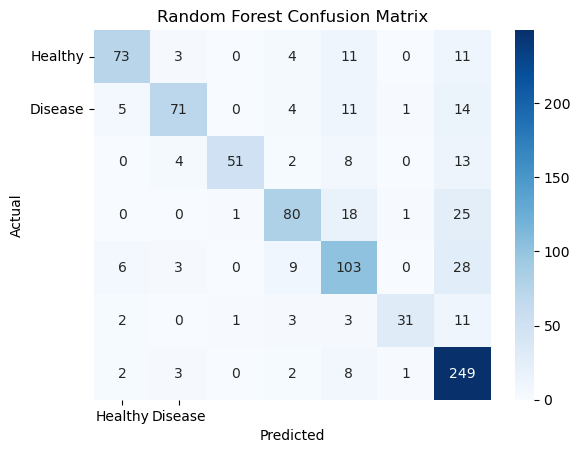

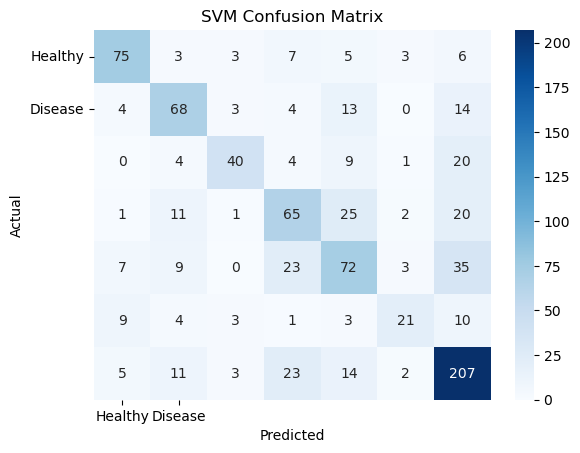

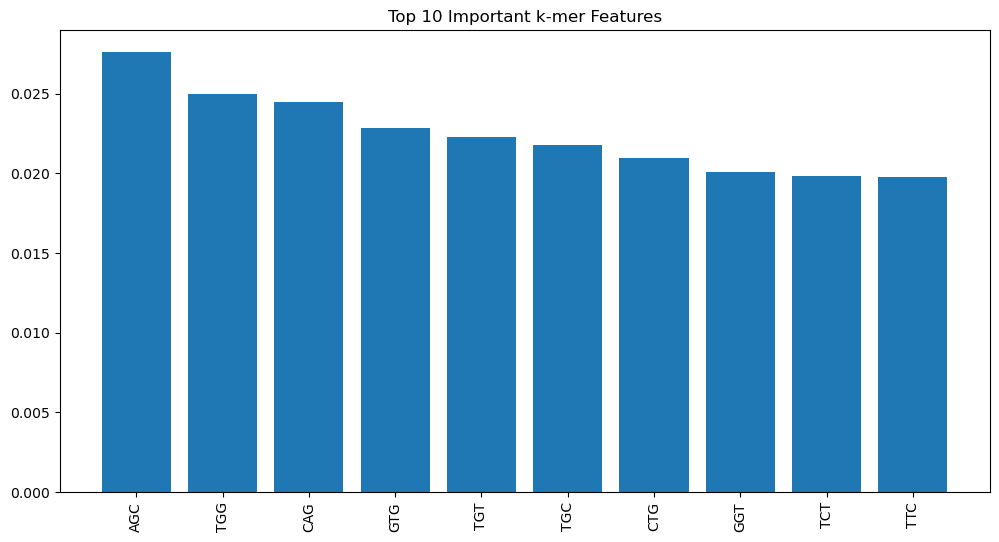

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

file_path = r"C:\Users\Ayaan\Downloads\archive\human.txt"
df = pd.read_csv(file_path, sep='\t')
print(df.head())

sequences = df['sequence']
labels = df['class']

def get_kmers(seq, k=3):
    return [seq[i:i+k] for i in range(len(seq)-k+1)]

vectorizer = CountVectorizer(analyzer=get_kmers)
X = vectorizer.fit_transform(sequences)
y = labels

X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
svm = SVC(kernel="linear").fit(X_train, y_train)

rf_pred, svm_pred = rf.predict(X_test), svm.predict(X_test)

def evaluate(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print(classification_report(y_true, y_pred))

evaluate("Random Forest", y_test, rf_pred)
evaluate("SVM", y_test, svm_pred)

def plot_cm(y_true, y_pred, title):
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues",
                xticklabels=["Healthy","Disease"], yticklabels=["Healthy","Disease"])
    plt.title(title); plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.show()

plot_cm(y_test, rf_pred, "Random Forest Confusion Matrix")
plot_cm(y_test, svm_pred, "SVM Confusion Matrix")

imp = rf.feature_importances_
idx = np.argsort(imp)[-10:][::-1]
plt.figure(figsize=(12,6))
plt.bar(range(10), imp[idx], tick_label=[X_df.columns[i] for i in idx])
plt.title("Top 10 Important k-mer Features"); plt.xticks(rotation=90); plt.show()
